In [9]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from yellowbrick.classifier import ConfusionMatrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

## Credit risk

In [4]:
with open('/home/tuts/data/mldsfromatoz/risco_credito.pkl', 'rb') as f:
    X, y = pickle.load(f)

In [12]:
attr = ['história', 'dívida', 'garantias', 'renda']

In [5]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(X, y)

preds = dt.predict(X)

In [8]:
dt.feature_importances_

array([0.41607015, 0.06408636, 0.03885431, 0.48098917])

In [7]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

        alto       0.86      1.00      0.92         6
       baixo       1.00      0.80      0.89         5
    moderado       1.00      1.00      1.00         3

    accuracy                           0.93        14
   macro avg       0.95      0.93      0.94        14
weighted avg       0.94      0.93      0.93        14



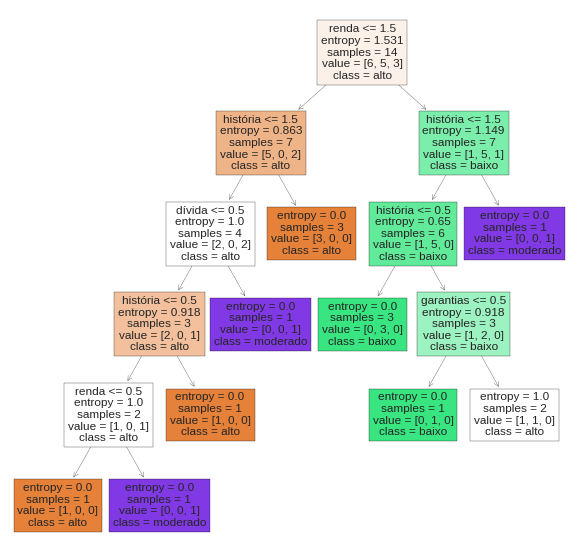

In [18]:
plt.figure(figsize=(10,10))
plot_tree(dt, feature_names=attr, class_names=dt.classes_, filled=True);

## Credit data

In [19]:
with open('credit_data_X.npy', 'rb') as f:
    X = np.load(f)

with open('credit_data_y.npy', 'rb') as f:
    y = np.load(f)
    
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2)

In [22]:
dt_cr = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_cr.fit(X_tr, y_tr)

preds = dt_cr.predict(X_t)

In [28]:
attr_cr = ['income', 'age', 'loan']

In [23]:
print(classification_report(y_t, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       348
           1       0.93      0.96      0.94        52

    accuracy                           0.98       400
   macro avg       0.96      0.98      0.97       400
weighted avg       0.99      0.98      0.99       400



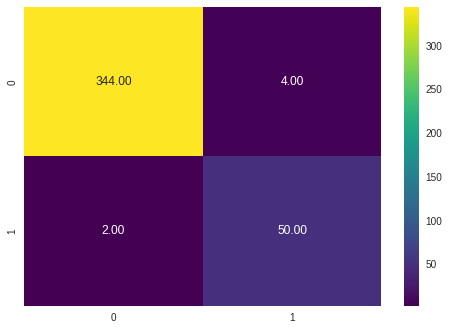

In [25]:
sns.heatmap(confusion_matrix(y_t, preds), annot=True, fmt='.2f', cmap='viridis');

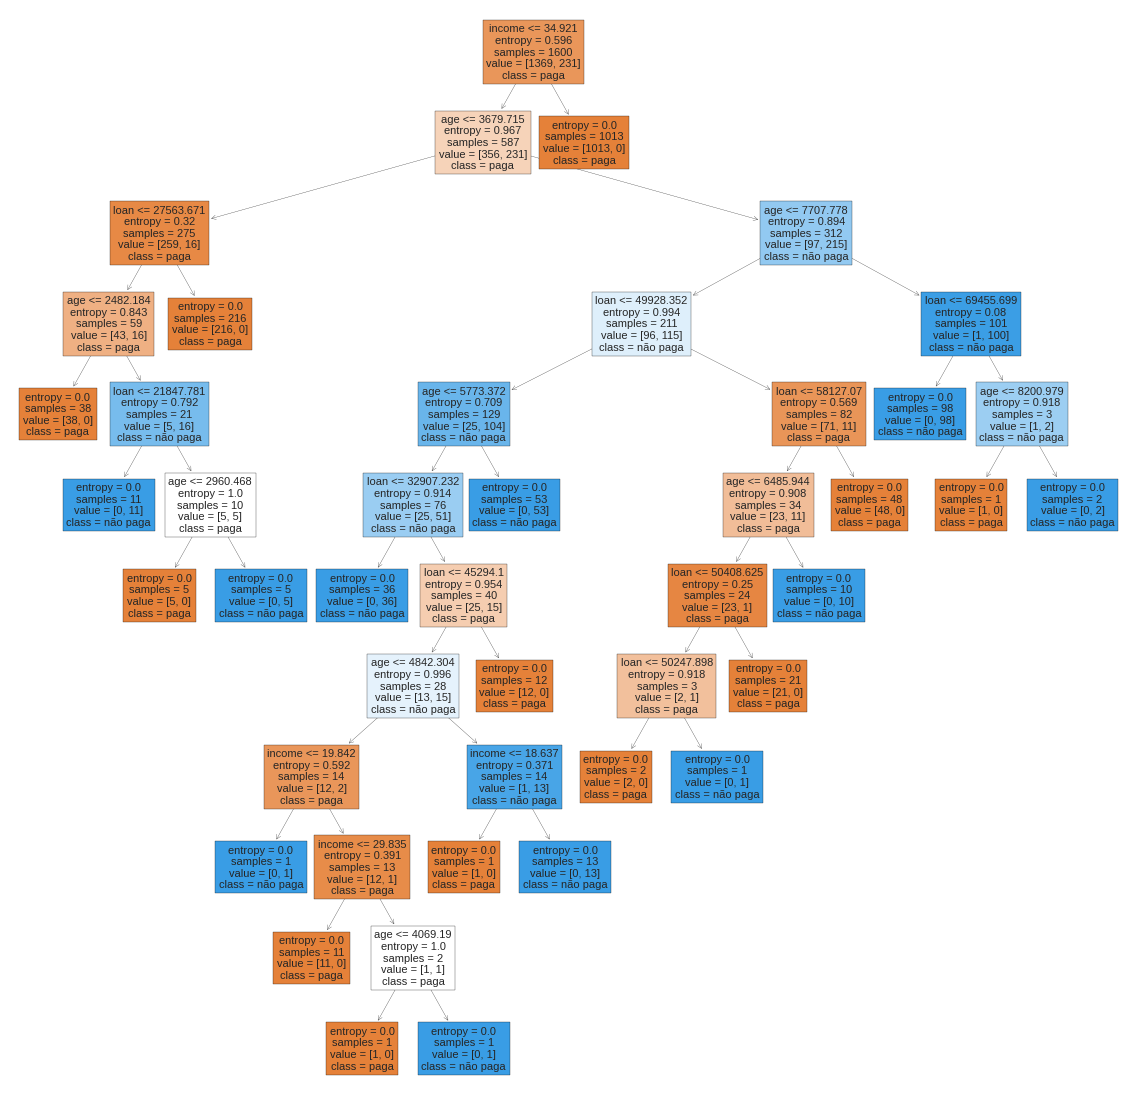

In [32]:
plt.figure(figsize=(20,20))
plot_tree(dt_cr, feature_names=attr_cr, class_names=['paga', 'não paga'], filled=True);

## Census

In [49]:
with open('/home/tuts/data/mldsfromatoz/census.pkl', 'rb') as f:
    X_tr, y_tr, X_t, y_t = pickle.load(f)
    
dt_c = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [50]:
dt_c.fit(X_tr, y_tr)

preds = dt_c.predict(X_t)

In [51]:
print(classification_report(y_t, preds))

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



In [52]:
def confusion_matrix_labels(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

    return np.asarray(labels).reshape(2,2)

In [53]:
cm = confusion_matrix(y_t, preds)

labels = confusion_matrix_labels(cm)

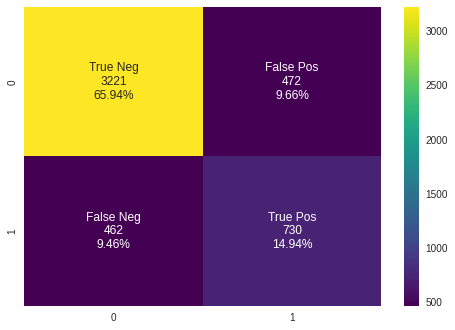

In [54]:
sns.heatmap(cm, annot=labels, fmt='', cmap='viridis');